In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec #Useful tool to arrange multiple plots in one figure (https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html)
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize as nrm 

%matplotlib inline

In [2]:
import platform
platstring = platform.platform()

data_dirname = 'visual-behavior-neuropixels'
use_static = False
if 'Darwin' in platstring or 'macOS' in platstring:
    # macOS 
    data_root = "/Volumes/Brain2022/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "F:/"
elif ('amzn' in platstring):
    # then on AWS
    data_root = "/data/"
    data_dirname = 'visual-behavior-neuropixels-data'
    use_static = True

In [3]:
from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

cache_dir = os.path.join(data_root, data_dirname)

cache = VisualBehaviorNeuropixelsProjectCache.from_local_cache(
            cache_dir=cache_dir, use_static_cache=use_static)

In [4]:
ecephys_sessions_table = cache.get_ecephys_session_table()

sst_novel_sessions = ecephys_sessions_table[(ecephys_sessions_table['genotype'].str.contains('Sst')) & 
                                            (ecephys_sessions_table['experience_level']=='Novel')]
sst_novel_sessions.head(1)

behavior_session_id      date_of_acquisition  \
ecephys_session_id                                                 
1053941483                   1053960987  2020-10-01 17:03:58.362   

                   equipment_name                 session_type  mouse_id  \
ecephys_session_id                                                         
1053941483                   NP.1  EPHYS_1_images_H_3uL_reward    527749   

                                                         genotype sex  \
ecephys_session_id                                                      
1053941483          Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   M   

                                project_code  age_in_days  unit_count  ...  \
ecephys_session_id                                                     ...   
1053941483          NeuropixelVisualBehavior          180      1543.0  ...   

                    channel_count  \
ecephys_session_id                  
1053941483                 2304.0   

                                                   structure_acronyms  \
ecephys_session_id                                                      
1053941483          ['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...   

                   image_set prior_exposures_to_image_set  session_number  \
ecephys_session_id                                                          
1053941483                 H                          0.0               2   

                    experience_level prior_exposures_to_omissions  file_id  \
ecephys_session_id                                                           
1053941483                     Novel                          1.0        6   

                    abnormal_histology abnormal_activity  
ecephys_session_id                                        
1053941483                         NaN               NaN  

[1 rows x 21 columns]

In [6]:
def plotUpVICellWaveformProperties(session_id):
    session = cache.get_ecephys_session(
            ecephys_session_id=session_id)
    stimulus_presentations = session.stimulus_presentations
    units = session.get_units()
    channels = session.get_channels()
    units = units.merge(channels, left_on='peak_channel_id', right_index=True)
    good_V1_units = units[(units['structure_acronym'].str.contains('VI')) & 
                      (units['quality'] == 'good') & 
                      (units['isi_violations'] < 1) & 
                      (units['snr'] > 1)
                     ]
    features_to_study = good_V1_units[['PT_ratio', 'recovery_slope', 'repolarization_slope', 'spread', 'waveform_duration']]
    features_to_study = features_to_study[features_to_study['PT_ratio']<1]
    features_to_study.dropna()
    features = features_to_study.to_numpy()
    kmeans = KMeans(n_clusters=3, random_state=0).fit(nrm(features, axis = 1))
    features_to_study['labels'] = kmeans.labels_
    sns.pairplot(features_to_study, hue='labels', palette='viridis')

plotUpVICellWaveformProperties(1053941483)

C:\Users\mstormbull\anaconda3\envs\swdb2022\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\mstormbull\anaconda3\envs\swdb2022\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


C:\Users\mstormbull\anaconda3\envs\swdb2022\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


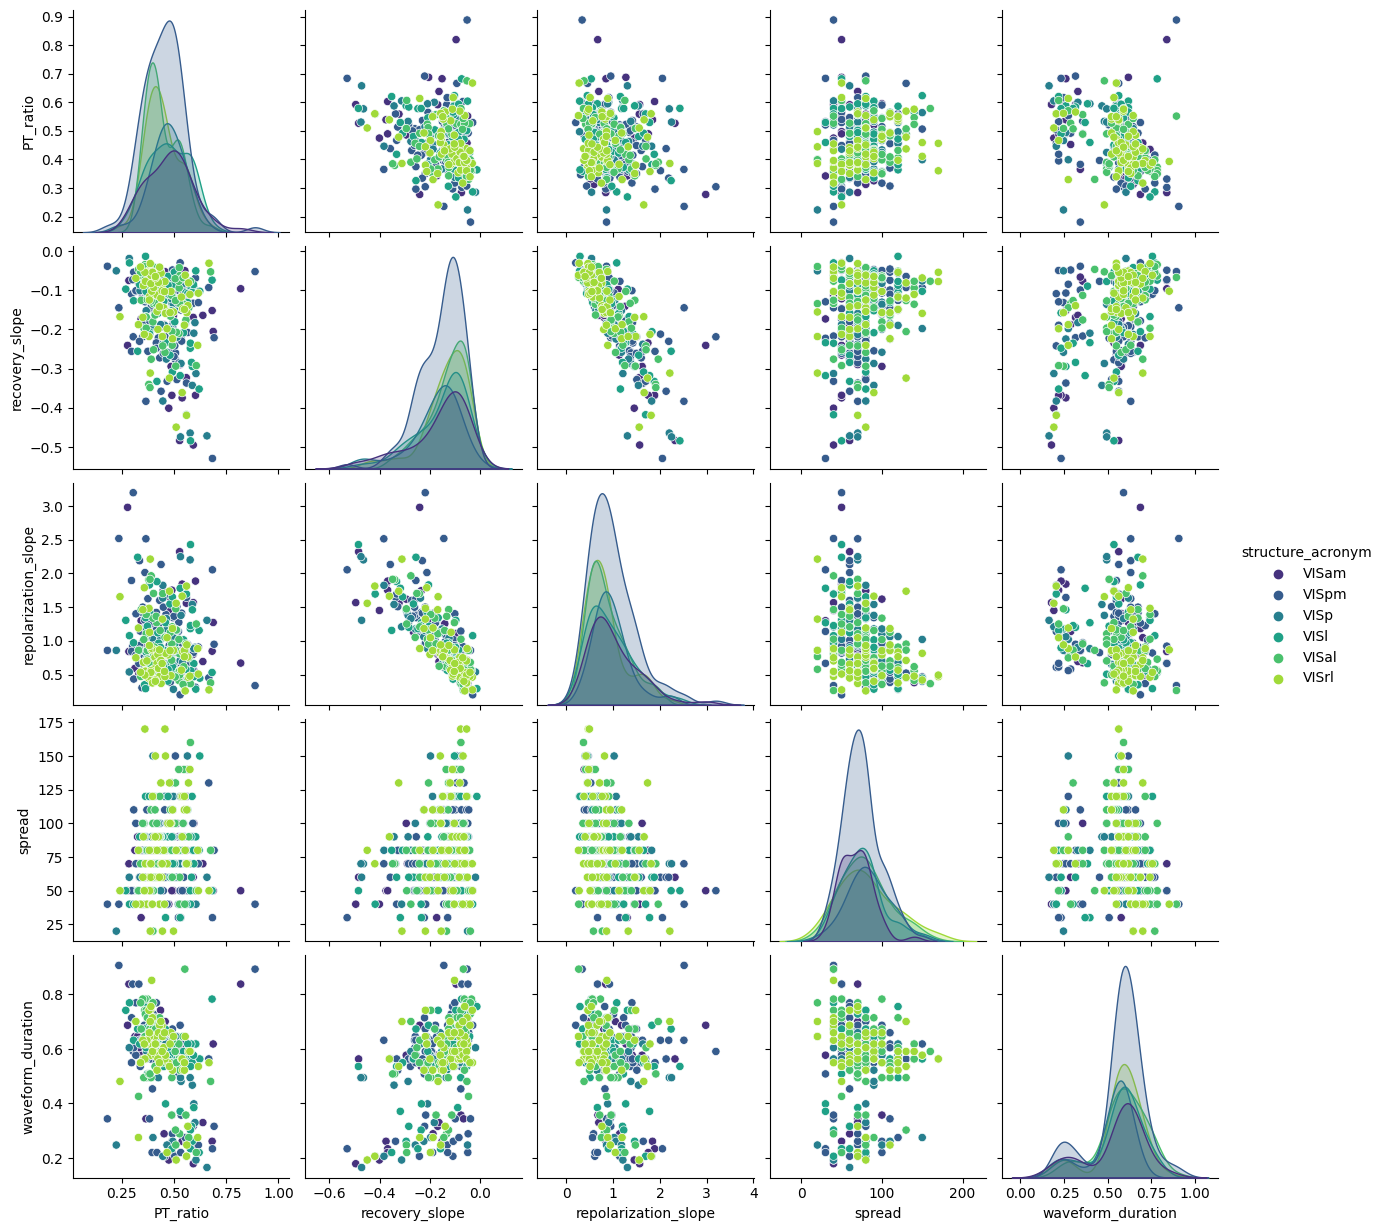

In [9]:
def plotUpVICellWaveformPropertiesByRegion(session_id):
    session = cache.get_ecephys_session(
            ecephys_session_id=session_id)
    stimulus_presentations = session.stimulus_presentations
    units = session.get_units()
    channels = session.get_channels()
    units = units.merge(channels, left_on='peak_channel_id', right_index=True)
    good_V1_units = units[(units['structure_acronym'].str.contains('VI')) & 
                      (units['quality'] == 'good') & 
                      (units['isi_violations'] < 1) & 
                      (units['snr'] > 1)
                     ]
    features_to_study = good_V1_units[['PT_ratio','structure_acronym', 'recovery_slope', 'repolarization_slope', 'spread', 'waveform_duration']]
    features_to_study = features_to_study[features_to_study['PT_ratio']<1]
    features_to_study.dropna()
    #features = features_to_study.to_numpy()
    #kmeans = KMeans(n_clusters=3, random_state=0).fit(nrm(features, axis = 1))
    #features_to_study['labels'] = kmeans.labels_
    sns.pairplot(features_to_study, hue='structure_acronym', palette='viridis')

plotUpVICellWaveformPropertiesByRegion(1053941483)

In [ ]:
def plotUpVICellWaveformPropertiesBySST(session_id, SSTids):
    session = cache.get_ecephys_session(
            ecephys_session_id=session_id)
    stimulus_presentations = session.stimulus_presentations
    units = session.get_units()
    channels = session.get_channels()
    units = units.merge(channels, left_on='peak_channel_id', right_index=True)
    good_V1_units = units[(units['structure_acronym'].str.contains('VI')) & 
                      (units['quality'] == 'good') & 
                      (units['isi_violations'] < 1) & 
                      (units['snr'] > 1)
                     ]
    features_to_study = good_V1_units[['PT_ratio','structure_acronym', 'recovery_slope', 'repolarization_slope', 'spread', 'waveform_duration']]
    features_to_study = features_to_study[features_to_study['PT_ratio']<1]
    features_to_study.dropna()
    #features = features_to_study.to_numpy()
    #kmeans = KMeans(n_clusters=3, random_state=0).fit(nrm(features, axis = 1))
    #features_to_study['labels'] = kmeans.labels_
    sns.pairplot(features_to_study, hue='structure_acronym', palette='viridis')

plotUpVICellWaveformPropertiesByRegion(1053941483)

## Extracting the SST cells from this optotagging

In [17]:
def makePSTH(spikes, startTimes, windowDur, binSize=0.001):
    '''
    Convenience function to compute a peri-stimulus-time histogram
    (see section 7.2.2 here: https://neuronaldynamics.epfl.ch/online/Ch7.S2.html)
    INPUTS:
        spikes: spike times in seconds for one unit
        startTimes: trial start times in seconds; the first spike count 
            bin will be aligned to these times
        windowDur: trial duration in seconds
        binSize: size of spike count bins in seconds
    OUTPUTS:
        Tuple of (PSTH, bins), where:
            PSTH gives the trial-averaged spike rate for 
                each time bin aligned to the start times;
            bins are the bin edges as defined by numpy histogram
    '''
    bins = np.arange(0,windowDur+binSize,binSize)
    counts = np.zeros(bins.size-1)
    for start in startTimes:
        startInd = np.searchsorted(spikes, start)
        endInd = np.searchsorted(spikes, start+windowDur)
        counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]
    
    counts = counts/len(startTimes)
    return counts/binSize, bins[:-1]


def make_neuron_time_trials_array(units, stim_table, 
                                   time_before, trial_duration, spike_times,
                                   bin_size=0.001):
    '''
    Function to make a 3D array with dimensions [neurons, time bins, trials] to store
    the spike counts for stimulus presentation trials. 
    INPUTS:
        units: dataframe with unit info (same form as session.units table)
        stim_table: dataframe whose indices are trial ids and containing a
            'start_time' column indicating when each trial began
        time_before: seconds to take before each start_time in the stim_table
        trial_duration: total time in seconds to take for each trial
        bin_size: bin_size in seconds used to bin spike counts 
    OUTPUTS:
        unit_array: 3D array storing spike counts. The value in [i,j,k] 
            is the spike count for neuron i at time bin j in the kth trial.
        time_vector: vector storing the trial timestamps for the time bins
    '''
    # Get dimensions of output array
    neuron_number = len(units)
    trial_number = len(stim_table)
    num_time_bins = int(trial_duration/bin_size)
    
    # Initialize array
    unit_array = np.zeros((neuron_number, num_time_bins, trial_number))
    
    # Loop through units and trials and store spike counts for every time bin
    for u_counter, (iu, unit) in enumerate(units.iterrows()):
        
        # grab spike times for this unit
        unit_spike_times = spike_times[iu]
        
        # now loop through trials and make a PSTH for this unit for every trial
        for t_counter, (it, trial) in enumerate(stim_table.iterrows()):
            trial_start = trial.start_time - time_before
            unit_array[u_counter, :, t_counter] = makePSTH(unit_spike_times, 
                                                            [trial_start], 
                                                            trial_duration, 
                                                            binSize=bin_size)[0]
    
    # Make the time vector that will label the time axis
    time_vector = np.arange(num_time_bins)*bin_size - time_before
    
    return unit_array, time_vector

In [21]:
def returnthe_putative_optotagged_SST(session_id):
    session = cache.get_ecephys_session(
                ecephys_session_id=session_id)
    opto_table = session.optotagging_table
    units = session.get_units()
    channels = session.get_channels()
    units = units.merge(channels, left_on='peak_channel_id', right_index=True)
    units = units.sort_values('probe_vertical_position', ascending=False)
    spike_times = session.spike_times

    #now we'll filter them for good units
    good_unit_filter = ((units['snr']>1)&             
                        (units['isi_violations']<1)& 
                        (units['firing_rate']>0.1)&   
                        (units['quality']=='good'))  

    area_filter = units['structure_acronym'].str.contains('VIS')
    cortical_units = units[good_unit_filter & area_filter]

    time_before_laser = 0.5
    trial_duration = 1.5
    bin_size = 0.001
    increase_in_FR = 5 #multiple increase over baseline rate
    min_evoked_rate = 50 #Hz

    time_array = np.arange(-time_before_laser,trial_duration-time_before_laser,bin_size)
    opto_array,time = make_neuron_time_trials_array(cortical_units, opto_table, time_before_laser, trial_duration, spike_times, bin_size)

    duration = opto_table.duration.min()
    level = opto_table.level.max()

    sel_trials=((opto_table['duration']==duration)&(opto_table['level']==level)).values

    #Average over these selected trials
    mean_opto_responses=np.nanmean(opto_array[:,:,sel_trials],2)

    # slice our data array to take the baseline period (before the laser turns on)
    baseline_time_idx = (time_array>=-0.010)&(time_array<-0.002)

    # then average over this time window in the mean_opto_responses to get the baseline rate for each unit
    baseline_rate = np.mean(mean_opto_responses[:,baseline_time_idx],1)

    evoked_rate_idx = (time_array>=0.001)&(time_array<0.009)
    evoked_rate = np.mean(mean_opto_responses[:,evoked_rate_idx],1)

    cre_pos_idx = (evoked_rate > min_evoked_rate) & ((evoked_rate / (baseline_rate + 1)) > increase_in_FR) 
    # add 1 to prevent divide-by-zero errors
    cre_pos_unit_ids = cortical_units[cre_pos_idx==True].index

    cre_pos_units = cortical_units.loc[cre_pos_unit_ids]
    return cre_pos_unit_ids

output = returnthe_putative_optotagged_SST(1053941483)

output[0]

C:\Users\mstormbull\anaconda3\envs\swdb2022\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


1061855316

In [29]:
def plotUpVICellWaveformPropertiesBySST(session_id, SSTids):
    session = cache.get_ecephys_session(
            ecephys_session_id=session_id)
    stimulus_presentations = session.stimulus_presentations
    units = session.get_units()
    channels = session.get_channels()
    units = units.merge(channels, left_on='peak_channel_id', right_index=True)
    good_V1_units = units[(units['structure_acronym'].str.contains('VI')) & 
                      (units['quality'] == 'good') & 
                      (units['isi_violations'] < 1) & 
                      (units['snr'] > 1)
                     ]
    features_to_study = good_V1_units[['PT_ratio', 'recovery_slope', 'repolarization_slope', 'spread', 'waveform_duration']]
    features_to_study = features_to_study[features_to_study['PT_ratio']<1]
    features_to_study.dropna()
    features_to_study['SSTcell'] = np.zeros([len(features_to_study),1])
    for i in range(len(features_to_study)):
        if features_to_study.index[i] in SSTids:
            features_to_study.loc[features_to_study.index[i]]['SSTcell'] = 1
            print('placed one!')
        else:
            features_to_study.loc[features_to_study.index[i]]['SSTcell'] = 0
    sns.pairplot(features_to_study, hue='SSTcell', palette='seismic')

plotUpVICellWaveformPropertiesBySST(1053941483, returnthe_putative_optotagged_SST(1053941483))

C:\Users\mstormbull\anaconda3\envs\swdb2022\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\mstormbull\anaconda3\envs\swdb2022\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!
placed one!


# This is extra code

In [10]:
session_id = 1053941483
session = cache.get_ecephys_session(
            ecephys_session_id=session_id)
stimulus_presentations = session.stimulus_presentations
units = session.get_units()
channels = session.get_channels()
units = units.merge(channels, left_on='peak_channel_id', right_index=True)

C:\Users\mstormbull\anaconda3\envs\swdb2022\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [17]:
units.head(1)

PT_ratio   amplitude  amplitude_cutoff  cluster_id  \
id                                                               
1061853767  0.738222  632.394165          0.000008          23   

            cumulative_drift    d_prime  firing_rate  isi_violations  \
id                                                                     
1061853767             79.63  10.843623    68.687706        0.000167   

            isolation_distance       l_ratio  ...  waveform_duration  \
id                                            ...                      
1061853767          246.203332  3.104812e-08  ...            0.20603   

            anterior_posterior_ccf_coordinate  dorsal_ventral_ccf_coordinate  \
id                                                                             
1061853767                             8254.0                         3707.0   

                                                    filtering  \
id                                                              
1061853767  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   

            left_right_ccf_coordinate  probe_channel_number  \
id                                                            
1061853767                     6982.0                    30   

           probe_horizontal_position    probe_id  probe_vertical_position  \
id                                                                          
1061853767                        59  1054059289                      320   

            structure_acronym  
id                             
1061853767                APN  

[1 rows x 34 columns]

In [21]:
good_V1_units = units[(units['structure_acronym'].str.contains('VI')) & 
                      (units['quality'] == 'good') & 
                      (units['isi_violations'] < 1) & 
                      (units['snr'] > 1)
                     ]
good_V1_units.head(1)

PT_ratio  amplitude  amplitude_cutoff  cluster_id  \
id                                                              
1061853941  0.490965  207.99051          0.273518         196   

            cumulative_drift   d_prime  firing_rate  isi_violations  \
id                                                                    
1061853941            347.89  3.966892     1.747814         0.37414   

            isolation_distance   l_ratio  ...  waveform_duration  \
id                                        ...                      
1061853941           60.672055  0.003726  ...            0.61809   

            anterior_posterior_ccf_coordinate  dorsal_ventral_ccf_coordinate  \
id                                                                             
1061853941                             7607.0                          615.0   

                                                    filtering  \
id                                                              
1061853941  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   

            left_right_ccf_coordinate  probe_channel_number  \
id                                                            
1061853941                     7642.0                   294   

           probe_horizontal_position    probe_id  probe_vertical_position  \
id                                                                          
1061853941                        59  1054059289                     2960   

            structure_acronym  
id                             
1061853941              VISam  

[1 rows x 34 columns]

In [78]:
features_to_study = good_V1_units[['PT_ratio', 'recovery_slope', 'repolarization_slope', 'spread', 'waveform_duration']]
features_to_study = features_to_study[features_to_study['PT_ratio']<1]
features_to_study.dropna()
features = features_to_study.to_numpy()
features
features_to_study

PT_ratio  recovery_slope  repolarization_slope  spread  \
id                                                                   
1061853941  0.490965       -0.112609              0.618665    70.0   
1061853945  0.457471       -0.052870              0.477453    70.0   
1061853900  0.819475       -0.096249              0.669639    50.0   
1061853930  0.312477       -0.059007              0.591308    80.0   
1061853917  0.538869       -0.374459              1.840844    50.0   
...              ...             ...                   ...     ...   
1061855334  0.561352       -0.157276              0.939657   110.0   
1061855270  0.442915       -0.101543              0.663516    70.0   
1061855280  0.538757       -0.361120              1.661722    90.0   
1061855279  0.549724       -0.149017              0.763502   120.0   
1061855342  0.454290       -0.103532              0.545558    40.0   

            waveform_duration  
id                             
1061853941           0.618090  
1061853945           0.700503  
1061853900           0.837856  
1061853930           0.645561  
1061853917           0.260972  
...                       ...  
1061855334           0.247236  
1061855270           0.590620  
1061855280           0.563149  
1061855279           0.549414  
1061855342           0.659296  

[389 rows x 5 columns]

In [79]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize as nrm 
kmeans = KMeans(n_clusters=3, random_state=0).fit(nrm(features, axis = 1))
features_to_study['labels'] = kmeans.labels_

C:\Users\mstormbull\anaconda3\envs\swdb2022\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [76]:
features_to_study

PT_ratio  recovery_slope  repolarization_slope  spread  \
id                                                                   
1061853941  0.490965       -0.112609              0.618665    70.0   
1061853891  1.105938       -1.241809              1.728842    50.0   
1061853945  0.457471       -0.052870              0.477453    70.0   
1061853900  0.819475       -0.096249              0.669639    50.0   
1061853930  0.312477       -0.059007              0.591308    80.0   
...              ...             ...                   ...     ...   
1061855334  0.561352       -0.157276              0.939657   110.0   
1061855270  0.442915       -0.101543              0.663516    70.0   
1061855280  0.538757       -0.361120              1.661722    90.0   
1061855279  0.549724       -0.149017              0.763502   120.0   
1061855342  0.454290       -0.103532              0.545558    40.0   

            waveform_duration  labels  
id                                     
1061853941           0.618090       2  
1061853891           0.151089       1  
1061853945           0.700503       2  
1061853900           0.837856       1  
1061853930           0.645561       2  
...                       ...     ...  
1061855334           0.247236       2  
1061855270           0.590620       2  
1061855280           0.563149       1  
1061855279           0.549414       2  
1061855342           0.659296       2  

[392 rows x 6 columns]

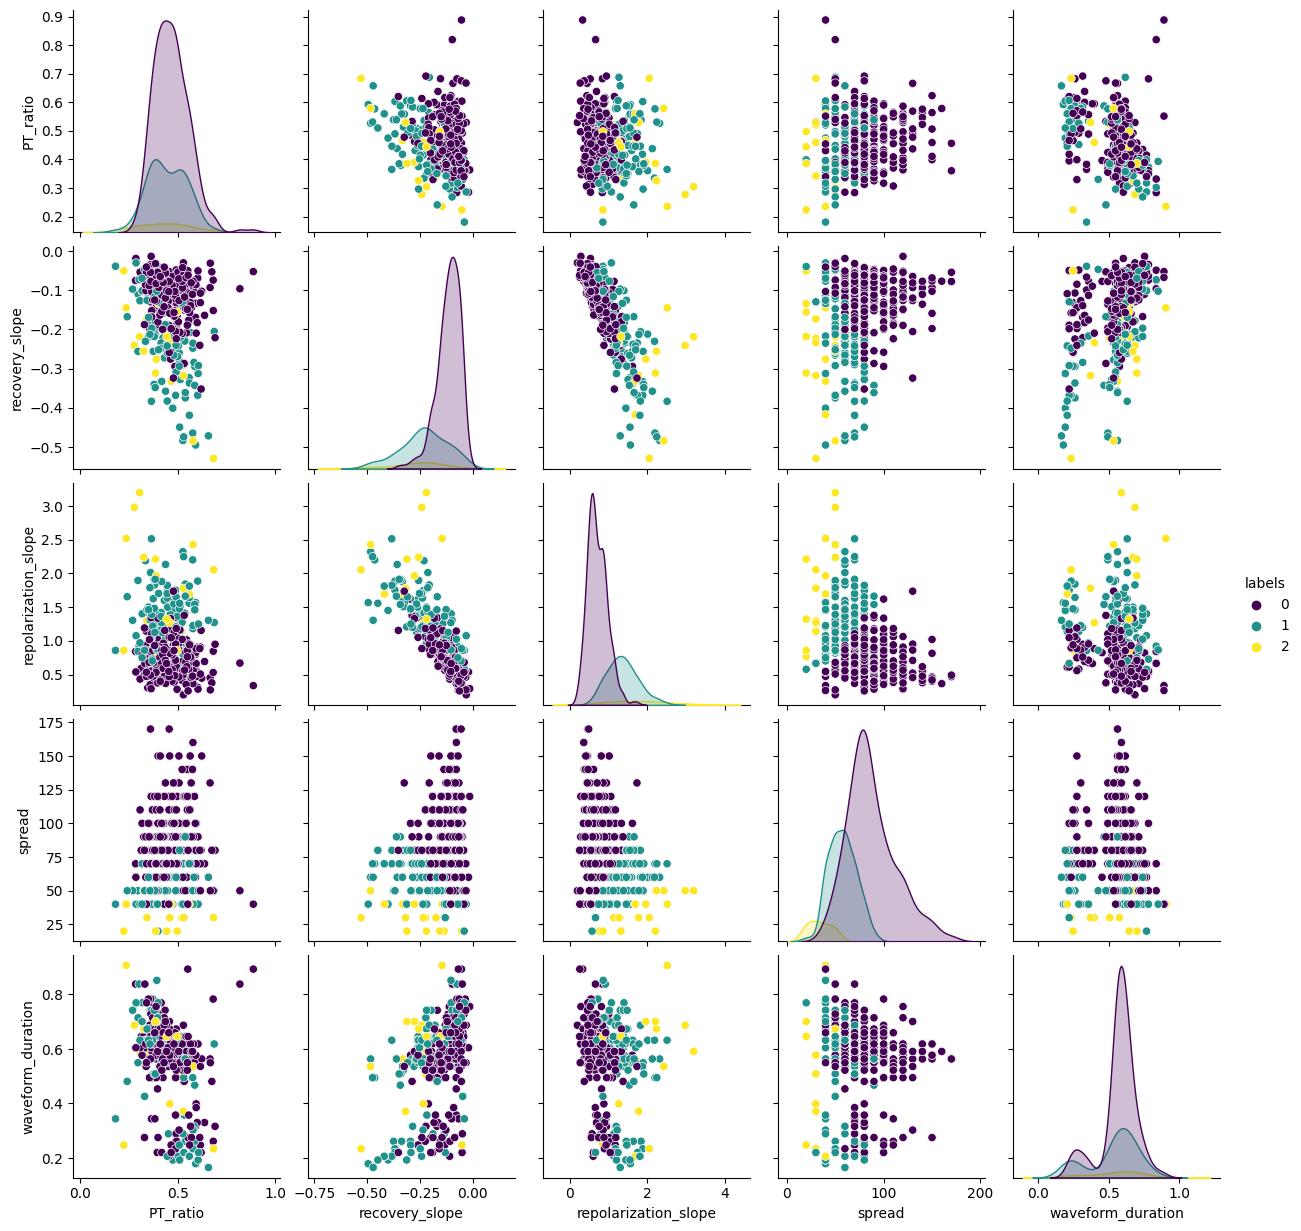

In [80]:
import seaborn as sns

sns.pairplot(features_to_study, hue='labels', palette='viridis')

C:\Users\mstormbull\anaconda3\envs\swdb2022\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\mstormbull\anaconda3\envs\swdb2022\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


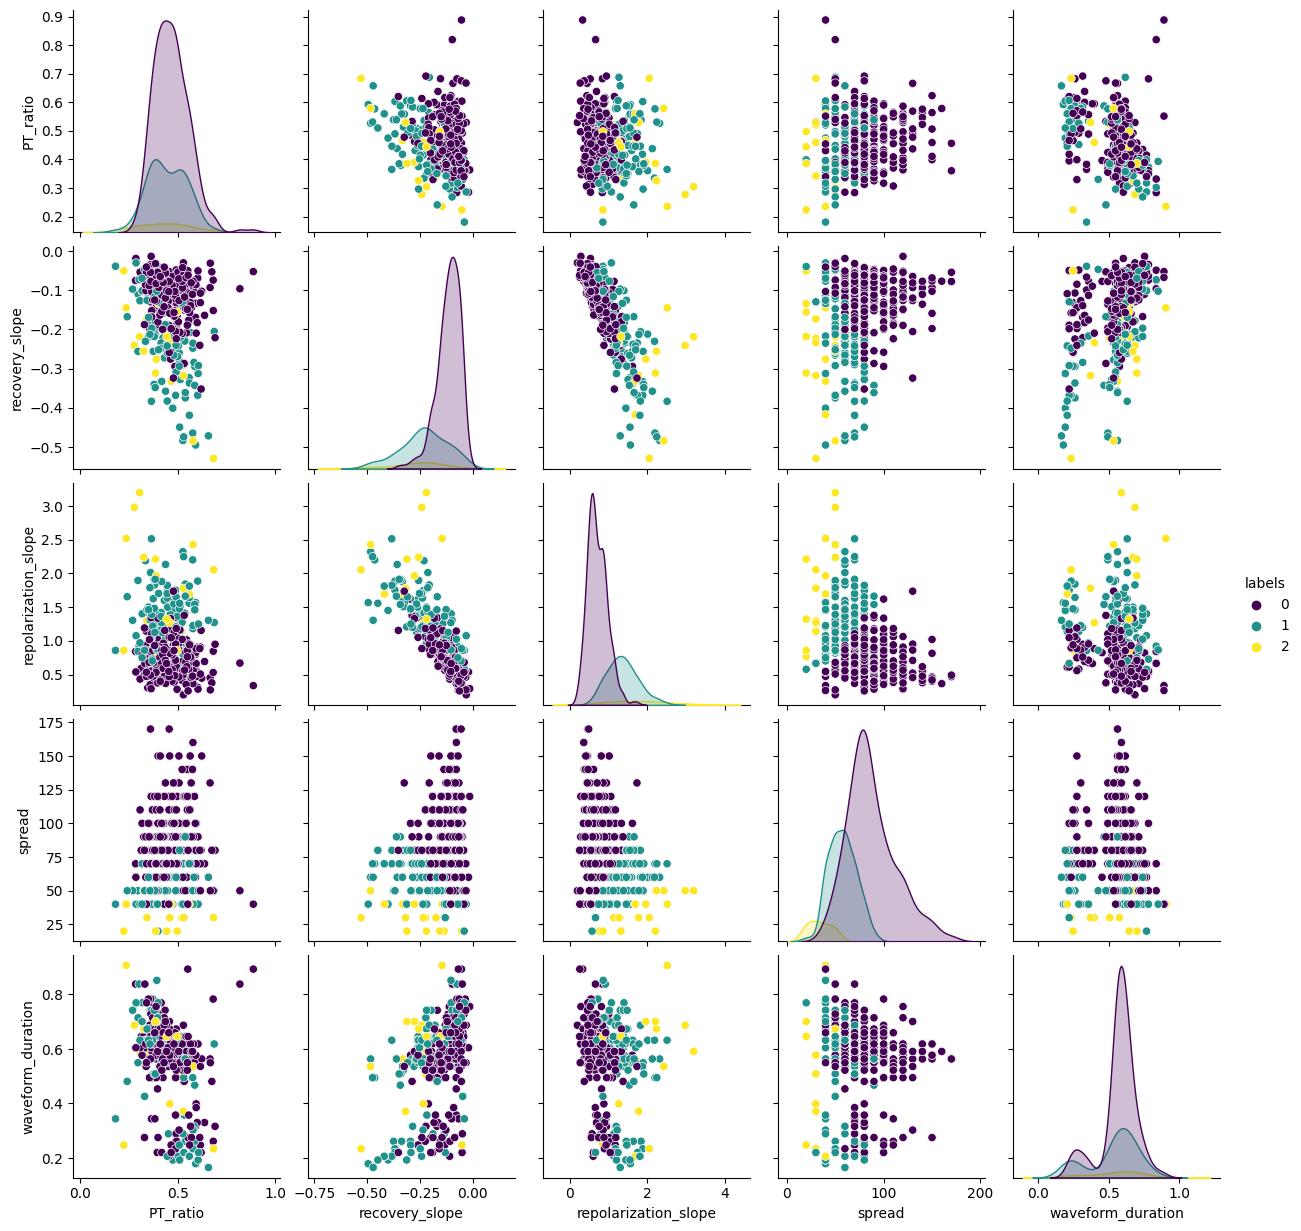

In [81]:
def plotUpVICellWaveformProperties(session_id):
    session = cache.get_ecephys_session(
            ecephys_session_id=session_id)
    stimulus_presentations = session.stimulus_presentations
    units = session.get_units()
    channels = session.get_channels()
    units = units.merge(channels, left_on='peak_channel_id', right_index=True)
    good_V1_units = units[(units['structure_acronym'].str.contains('VI')) & 
                      (units['quality'] == 'good') & 
                      (units['isi_violations'] < 1) & 
                      (units['snr'] > 1)
                     ]
    features_to_study = good_V1_units[['PT_ratio', 'recovery_slope', 'repolarization_slope', 'spread', 'waveform_duration']]
    features_to_study = features_to_study[features_to_study['PT_ratio']<1]
    features_to_study.dropna()
    features = features_to_study.to_numpy()
    kmeans = KMeans(n_clusters=3, random_state=0).fit(nrm(features, axis = 1))
    features_to_study['labels'] = kmeans.labels_
    sns.pairplot(features_to_study, hue='labels', palette='viridis')

plotUpVICellWaveformProperties(session_id)